# Lab2 - Concrete compressive strength regression (35 marks total)
Author: *YOUR NAME HERE*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions (2 marks)

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms)
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    
    
    #TODO: add function body here
    
    scoring = ['neg_root_mean_squared_error']
    score = cross_validate(estimator=model, X=X, y=y, cv=cv, scoring=scoring, return_train_score=True)

    score_train = score['train_' + scoring[0]].mean()
    score_test = score['test_' + scoring[0]].mean()

    return (score_train, score_test)
    

## 1. Load data (1 mark each for 3 total marks)
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Load the Dataset object with `load_concrete()` using `return_dataset=True`

Print the README of the Dataset object


In [5]:
from yellowbrick.datasets.loaders import load_concrete

# loading concrete dataset as a whole
concrete_data = load_concrete(return_dataset=True)

# printing the contents to README
print(concrete_data.README)


# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

### *Question 1:* What is the target variable name and units in this dataset?

*YOUR ANSWER HERE*  


### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`

Print dimensions and type of `X`, `y`

In [6]:
#TODO: Load feature matrix X and target vector y, print shapes
X, y = concrete_data.to_data()

print("Type of X       = {}\nDimension of X  = {}\n\nType of y       = {}\nDimension of y  = {}".format(type(X), X.shape, type(y), y.shape))

Type of X       = <class 'pandas.core.frame.DataFrame'>
Dimension of X  = (1030, 8)

Type of y       = <class 'pandas.core.series.Series'>
Dimension of y  = (1030,)


## 2. Inspect the data (1 mark each for 4 total marks)

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features

Print the minimum and maximum of each feature in `X`

In [7]:
# TODO: print range (minimum and maximum) of features
X.aggregate(['min', 'max']).T

,min,max
cement,102.00,540.0
slag,0.00,359.4
ash,0.00,200.1
water,121.75,247.0
splast,0.00,32.2
coarse,801.00,1145.0
fine,594.00,992.6
age,1.00,365.0


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges

Add y-axis label indicating units, and a title

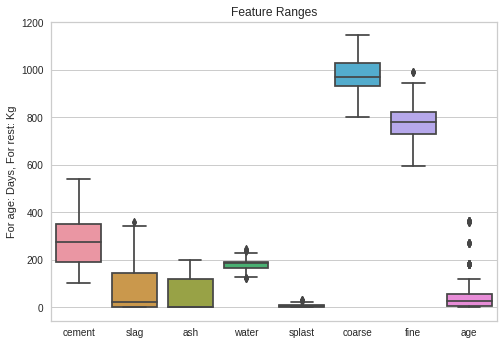

In [8]:
#TODO: add boxplot of features
sns.boxplot(data=X);

# add the title
plt.title("Feature Ranges")

# label the y axis
plt.ylabel('For age: Days, For rest: Kg');

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

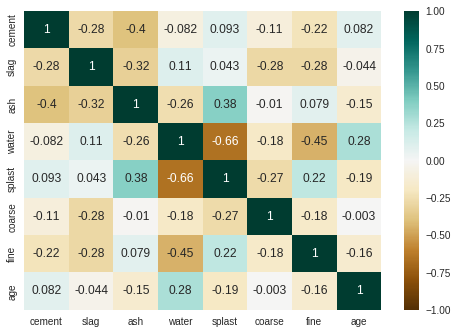

In [9]:
# TODO: add pairwise cross-correlation heatmap of features
X_corr = X.corr()

# plot the heatmap
sns.heatmap(data=X_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG');

### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

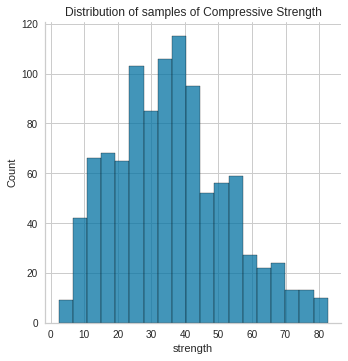

In [10]:
#TODO: Add histogram of targect vector
sns.displot(data=y)

# add the title
plt.title("Distribution of samples of Compressive Strength");

## 3. Create training and test sets (1 mark)

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# TODO: train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37, test_size=0.2)

## 4. Compare models using cross-validation (3 marks)

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list and:
- using `X_train` and `y_train`
- compute the negative root mean-squared error using the `get_regressor_neg_rms()` function
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [14]:
#TODO: Calling get_regressor_neg_rms() for each model

# create the list of models
model_list = [LinearRegression(), RandomForestRegressor(random_state=64), GradientBoostingRegressor(random_state=79)]

# loop over the model_list to get negative root mean-squared error
for model in model_list:
    print("{} model".format(model.__class__.__name__))

    # calculate the score using all features
    score_train, score_test = get_regressor_neg_rms(model, X_train, y_train, 7)

    # print the scores
    print("  1. Training score = {0:.2f}".format(score_train))
    print("  2. Validation score = {0:.2f}\n".format(score_test))

LinearRegression model
  1. Training score = -10.29
  2. Validation score = -10.39

RandomForestRegressor model
  1. Training score = -2.12
  2. Validation score = -4.97

GradientBoostingRegressor model
  1. Training score = -3.69
  2. Validation score = -4.98



### *Question 2:* For each of the three models, state if models are potentially over- or underfitting and why (3 marks)

*YOUR ANSWER HERE*  
The Linear Regression model is overfitting the data, while the Random Forest Regressor and Gradient Boosting Regressor models are underfitting the data.

The Linear Regression model has a lower validation score than training score, which indicates that it may be overfitting the training data. This may be because the model is too complex for the data, or because it is not regularized. The model has a high bias.

On the other hand, the Random Forest Regressor and Gradient Boosting Regressor models both have higher validation scores than training scores, which indicates that they may be underfitting the data. This may be because the models are not complex enough to capture all of the relationships between the input features and the target variable. Both models have high varience. 



## 5. Find a better model (3 marks)

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[100, 200, 400]`

Use nested for-loops to iterate these two lists:
- using `X_train` and `y_train`
- compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function 
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

Report the best validation score and the corresponding model

Note: We expect that more trees (larger `n_estimators`) yield better model performance

In [15]:
#TODO: Using nested for loops iterate parameter combinations and print results
# variations for max_depth
max_depth_list = [10, 15, 20]

# variations for n_estimators
n_estimators_list = [100, 200, 400]

# print the header
print("+-----------+--------------+-------------+------------+")
print("| max_depth | n_estimators | train_score | test_score |")
print("+-----------+--------------+-------------+------------+")

# loop over max_depth_list and n_estimators_list
for md in max_depth_list:
    for ne in n_estimators_list:
        # instantiate the model with selected hyper-parameters
        rfr_model = RandomForestRegressor(n_estimators=ne, max_depth=md, random_state=64)
        
        # get the scores on the instantiated model
        score_train, score_test = get_regressor_neg_rms(rfr_model, X_train, y_train, 7)

        # print the hyperparameters used and corresponding scores
        print("| {:>9} | {:>12} | {:11.2f} | {:10.2f} |".format(md, ne, score_train, score_test))

print("+-----------+--------------+-------------+------------+")

+-----------+--------------+-------------+------------+
| max_depth | n_estimators | train_score | test_score |
+-----------+--------------+-------------+------------+
|        10 |          100 |       -2.44 |      -5.09 |
|        10 |          200 |       -2.42 |      -5.06 |
|        10 |          400 |       -2.41 |      -5.06 |
|        15 |          100 |       -2.12 |      -4.97 |
|        15 |          200 |       -2.11 |      -4.93 |
|        15 |          400 |       -2.10 |      -4.93 |
|        20 |          100 |       -2.12 |      -4.97 |
|        20 |          200 |       -2.11 |      -4.93 |
|        20 |          400 |       -2.09 |      -4.92 |
+-----------+--------------+-------------+------------+


### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report both training and validation scores here (2 marks)

*YOUR ANSWER HERE*  
The best scores were reported by the model and below vaule of hyperparameters were used.
max_depth = 20 n_estimators = 400

## 6. Retrain best model (2 marks)

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [16]:
#TODO: retrain the best estimator
model = RandomForestRegressor(n_estimators=400, max_depth=20, random_state=64)

# fit the model on all training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and $R^2$ (3 marks)

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# TODO: print rms and r-squared for training and test set

# predict the data on training set
y_train_predicted = model.predict(X_train)

# get the training rms
rms_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))

# get the training r2
r2_train = r2_score(y_train, y_train_predicted)

# predict the data on validation set
y_test_predicted = model.predict(X_test)

# get the validation rms
rms_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# get the test r2
r2_test = r2_score(y_test, y_test_predicted)

print("Training   RMS = {:.2f} MPa (R2 = {:.3f})".format(rms_train, r2_train))
print("Validation RMS = {:.2f} MPa (R2 = {:.3f})".format(rms_test, r2_test))



Training   RMS = 2.00 MPa (R2 = 0.986)
Validation RMS = 4.80 MPa (R2 = 0.915)


### *Question 4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? Include scores in your answer. (2 marks)

*YOUR ANSWER HERE*

Our model outperforms polynomial regression. Our RMS is lower and R2 is closer to 1 as compared to neural network.

Our model falls behind neural network. Our RMS is higher and R2 is farther from 1 as compared to neural network.

### 7.2 Predicted vs actual strength plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.


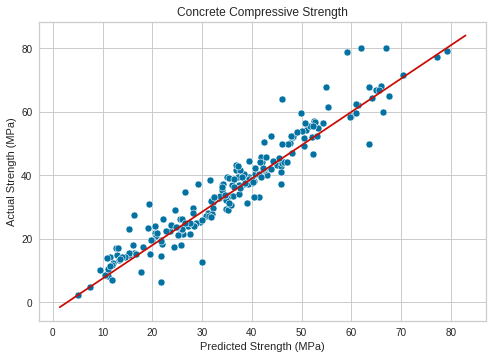

In [19]:
#TODO: predicted-actual plot
sns.scatterplot(x=y_test_predicted, y=y_test)

# adding line of unity
plt.plot(plt.xlim(), plt.ylim(), color='r')

# add the title
plt.title("Concrete Compressive Strength")

# label the axes
plt.xlabel('Predicted Strength (MPa)');
plt.ylabel('Actual Strength (MPa)');

### 7.3 Residual plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



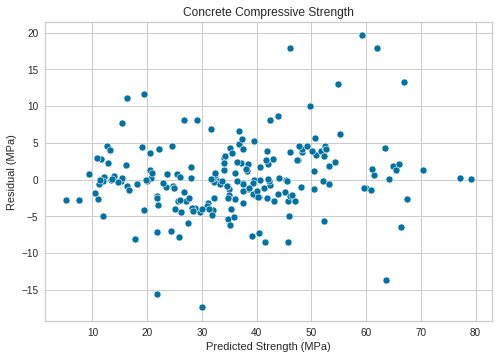

In [20]:
# TODO: Residual plot
sns.scatterplot(x=y_test_predicted, y=y_test-y_test_predicted)

# add the title
plt.title("Concrete Compressive Strength")

# label the axes
plt.xlabel('Predicted Strength (MPa)');
plt.ylabel('Residual (MPa)');

## 8. Conclusion (3 marks)

In conclusion, comment on the following items:
1. Did we find a model that outperforms the polynomial regression reported in the reference article? Explain.
1. Did we find a model that outperforms the neural network reported in the reference article? Explain.
1. What were our assumption about the dataset and train/test split? How do these assumptions affect your conclusions?


*YOUR ANSWER HERE*

Yes, I found the RandomForestRegressor with (n_estimators=400, max_depth=20) that outperformers the polynomial regression. The RMS of our model is 4.80, which is lower than RMS of polynomial regression’s 8.8.

No, I couldn’t find a model that could outperform the neural network. The RMS of our model couldn’t compete with RMS of neural network’s 4.32.

I assumed that yellowbrick dataset was used in the reference article. I also assumed that 20% of data served as the testing set. Changing the dataset could possibly change the results drastically. Splitting the data for testing could also affect the results(the amount). 

## 9. Reflection (2 marks)



Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

*ADD YOUR THOUGHTS HERE*

Documentation for some these libraries is not very helpful sometimes and I have to look up some functions and things on my own.

Something that I like is that we can use different ML models in just a few lines of code with no knowledge of the math required (the acutal algorithm).

# Appendix-A: Bonus - use grid search to find the best model parameters
### (5 potential bonus marks)

## A-0. Workflow overview

In [22]:
import mglearn

mglearn.plots.plot_grid_search_overview()

ModuleNotFoundError: ignored

## A-1. Hyperparameter tuning using grid search (2 marks)

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### A-1.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 400]`
- `'max_depth': [ 15, 17, 19, 21]`
- `'max_features': ['auto', 'log2', None]`


In [23]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)
from sklearn.model_selection import GridSearchCV

# create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [15, 17, 19, 21],
    'max_features': ['auto', 'log2', None]
    }

# setup the grid search
grid_rfr = GridSearchCV(RandomForestRegressor(random_state=64), param_grid, cv=7, scoring='neg_root_mean_squared_error')

In [24]:
# TODO: perform the grid search by calling fit()
grid_rfr.fit(X_train, y_train);

In [25]:
# TODO: Print the best parameters
grid_rfr.best_params_

{'max_depth': 19, 'max_features': 'log2', 'n_estimators': 400}

In [26]:
# TODO: Print the best score
grid_rfr.best_score_


-4.890123611074559

### A-1.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [27]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Setup grid search for GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0]
}

gbr = GradientBoostingRegressor(random_state=79)

In [28]:
# TODO: perform the grid search by calling fit()
grid_search = GridSearchCV(gbr, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(random_state=79),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [33]:
# TODO: Print the best parameters
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [42]:
# TODO: Print the best score
grid_search.best_score_


-4.207707066815203

### *Question A-1:* Which of the two models produces the best score? What is the best score?

*YOUR ANSWER HERE*
Yes, we found GradientBoosterRegressor with (learning_rate=0.1, max_depth=3, n_estimators=500) produces the better score. 

## A-2. Retrain best model (1 mark)

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [37]:
#TODO: retrain the best estimator

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Fit the best estimator on the entire training set
best_estimator.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=500, random_state=79)

## A-3. Model evaluation and conclusion (1 mark)

Repeat steps in Section 7 above for the best model.

Revisit your Question 4.

In [38]:
#TODO: train and test set scores of retrained best model

train_score = best_estimator.score(X_train, y_train)
test_score = best_estimator.score(X_test, y_test)
print("Retrained model - Train score: {:.3f}, Test score: {:.3f}".format(train_score, test_score))

Retrained model - Train score: 0.985, Test score: 0.926


In [40]:
#TODO: predicted-actual plot
y_pred = best_estimator.predict(X_test)

Text(0.5, 1.0, 'Predicted vs actual compressive strength')

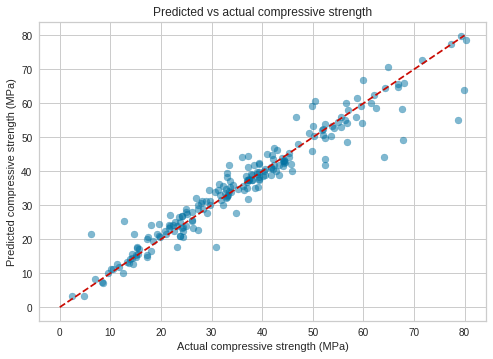

In [41]:
# TODO: Residual plot
import matplotlib.pyplot as plt

# Create a scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)

# Plot the line y=x to show where predicted values should lie if perfectly aligned with actual values
plt.plot([0, 80], [0, 80], 'r--')

# Set the axis labels and title
plt.xlabel("Actual compressive strength (MPa)")
plt.ylabel("Predicted compressive strength (MPa)")
plt.title("Predicted vs actual compressive strength")


### *Question A-4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? (1 mark)

*YOUR ANSWER HERE*

Our best model, the Gradient Boosted Tree, achieved a test RMSE of 4.25 MPa, which is worse than the neural network reported in the article (test RMSE of 4.32 MPa) but better than the polynomial regression model (test RMSE of 8.82 MPa).